EE 769, Spring 2020-21
Programming Assignment 1, **Question 2**

Vyomkesh Chaudhary, 203070028

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#PART A: Download Datasets

In [ ]:
from google.colab import files

data_upload = files.upload()

for file_name in data_upload.keys():
  print(f"{file_name} has been uploaded, with length {len(data_upload[file_name])}")

Saving Data_Cortex_Nuclear.xls to Data_Cortex_Nuclear.xls
Data_Cortex_Nuclear.xls has been uploaded, with length 1628672


In [ ]:
df_mice = pd.read_excel('Data_Cortex_Nuclear.xls')

# PART C: Explore, Visualize, Pre-process

In [ ]:
display(df_mice)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

There are 1080 samples, and 82 columns.

Excluding 'mouse_id', 'genotype', 'treatment', 'behaviour', 'class', there are **77 features**

Observe the data types

In [ ]:
print(df_mice.dtypes)

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object


In [ ]:
print(pd.unique(df_mice.dtypes))

[dtype('O') dtype('float64')]


In [ ]:
sum(df_mice.dtypes == 'float64')

77

In [ ]:
sum(df_mice.dtypes == 'O')

5

Get desired features

In [ ]:
features = df_mice.columns.values
features = features[1:-4]
print(features)

['DYRK1A_N' 'ITSN1_N' 'BDNF_N' 'NR1_N' 'NR2A_N' 'pAKT_N' 'pBRAF_N'
 'pCAMKII_N' 'pCREB_N' 'pELK_N' 'pERK_N' 'pJNK_N' 'PKCA_N' 'pMEK_N'
 'pNR1_N' 'pNR2A_N' 'pNR2B_N' 'pPKCAB_N' 'pRSK_N' 'AKT_N' 'BRAF_N'
 'CAMKII_N' 'CREB_N' 'ELK_N' 'ERK_N' 'GSK3B_N' 'JNK_N' 'MEK_N' 'TRKA_N'
 'RSK_N' 'APP_N' 'Bcatenin_N' 'SOD1_N' 'MTOR_N' 'P38_N' 'pMTOR_N'
 'DSCR1_N' 'AMPKA_N' 'NR2B_N' 'pNUMB_N' 'RAPTOR_N' 'TIAM1_N' 'pP70S6_N'
 'NUMB_N' 'P70S6_N' 'pGSK3B_N' 'pPKCG_N' 'CDK5_N' 'S6_N' 'ADARB1_N'
 'AcetylH3K9_N' 'RRP1_N' 'BAX_N' 'ARC_N' 'ERBB4_N' 'nNOS_N' 'Tau_N'
 'GFAP_N' 'GluR3_N' 'GluR4_N' 'IL1B_N' 'P3525_N' 'pCASP9_N' 'PSD95_N'
 'SNCA_N' 'Ubiquitin_N' 'pGSK3B_Tyr216_N' 'SHH_N' 'BAD_N' 'BCL2_N' 'pS6_N'
 'pCFOS_N' 'SYP_N' 'H3AcK18_N' 'EGR1_N' 'H3MeK4_N' 'CaNA_N']


In [ ]:
df_features = df_mice[features].copy()
display(df_features)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.129954,NaN,0.104784,0.110694,0.4341

Observe genotype and class columns

In [ ]:
pd.unique(df_mice['Genotype'])

array(['Control', 'Ts65Dn'], dtype=object)

In [ ]:
pd.unique(df_mice['class'])

array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
       't-CS-s', 't-SC-s'], dtype=object)

**The 'Genotype' will be predicted (as output) in this notebook**

In [ ]:
for col in df_features.columns.values: # for each column
  unique_entries = pd.unique(df_features[col]) # unique elements in a column
  print(f"The column '{col}' has range {unique_entries.min()} to {unique_entries.max()}, has {len(unique_entries)} unique entries, and {df_features[col].isnull().sum()} NaN values")

The column 'DYRK1A_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'ITSN1_N' has range nan to nan, has 1077 unique entries, and 3 NaN values
The column 'BDNF_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'NR1_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'NR2A_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'pAKT_N' has range nan to nan, has 1077 unique entries, and 3 NaN values
The column 'pBRAF_N' has range nan to nan, has 1076 unique entries, and 3 NaN values
The column 'pCAMKII_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'pCREB_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'pELK_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'pERK_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'pJNK_N' has range nan to nan, has 1077 unique entries, an

1. There are significant number of NaN values. 
2. Ranges of each column vary significantly

Perform multivariable imputation

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter = 30, random_state = 0)

imp.fit(df_features)

df_features_imputed = pd.DataFrame(imp.transform(np.array(df_features)))
display(df_features_imputed)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.108580,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.110223,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.110027,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.118306,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.129954,0.117433,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
df_features_imputed.columns = features
display(df_features_imputed)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.108580,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.110223,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.110027,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.118306,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.129954,0.117433

Plot histograms of columns to observe spread

In [ ]:
def get_column_histograms(df):
  num_cols_df = len(df.columns.values)
  count = 1
  for col in df.columns.values:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel("counts")  
    count +=1
    plt.show()

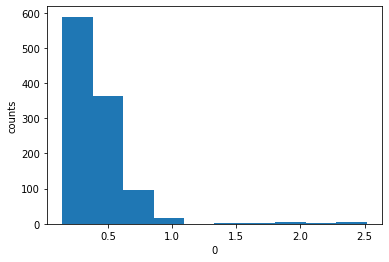

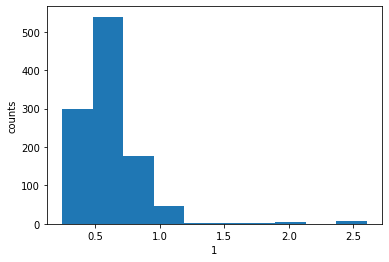

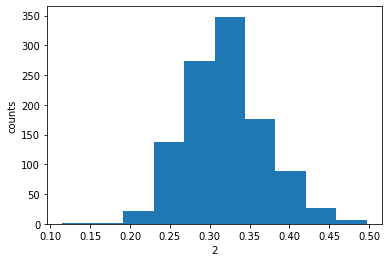

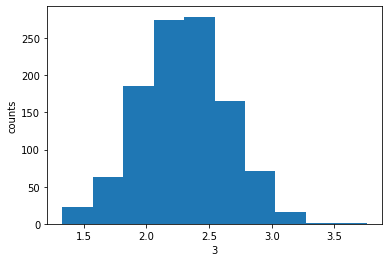

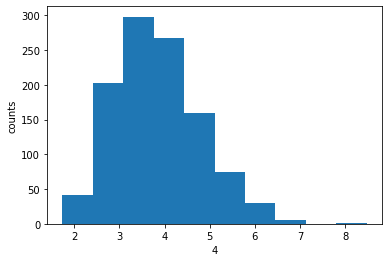

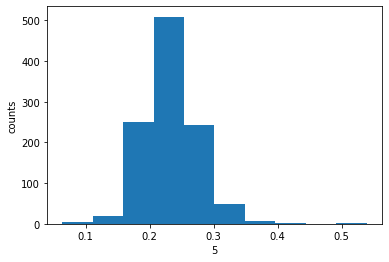

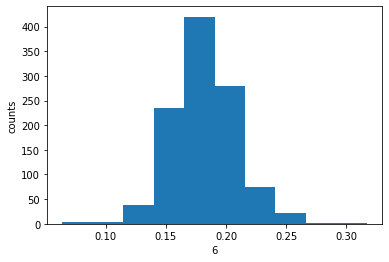

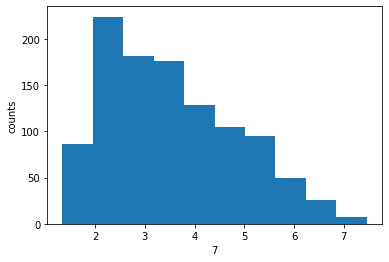

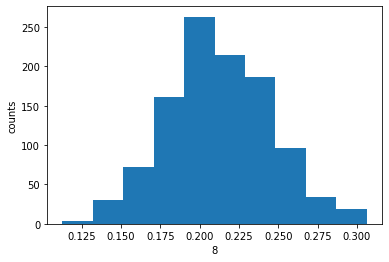

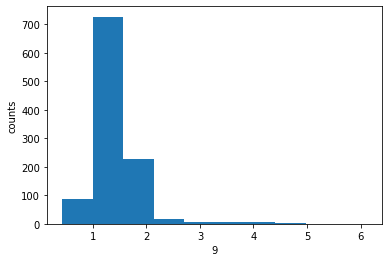

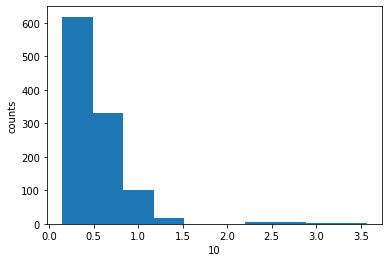

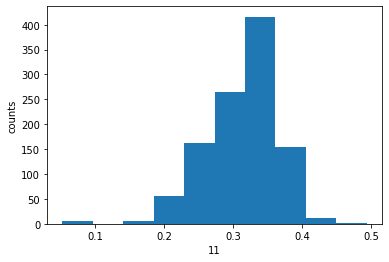

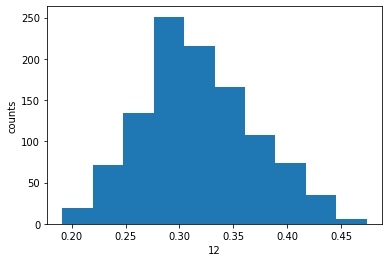

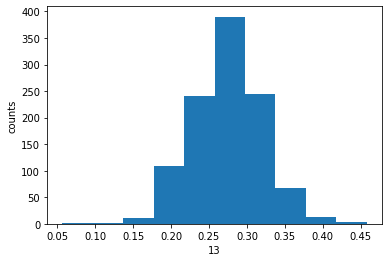

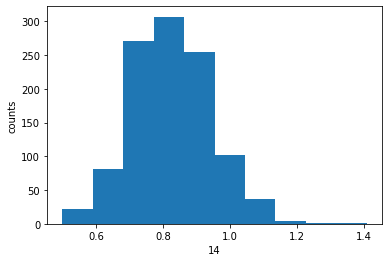

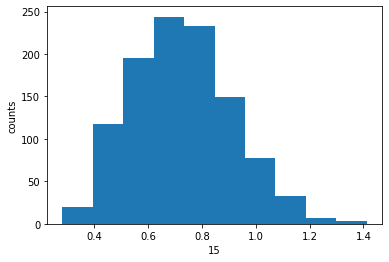

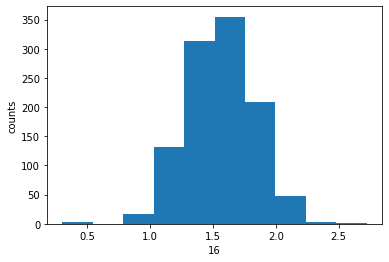

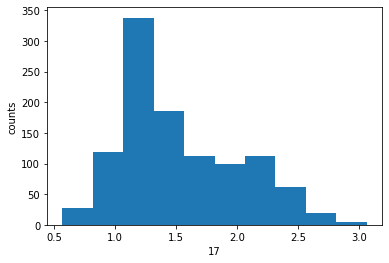

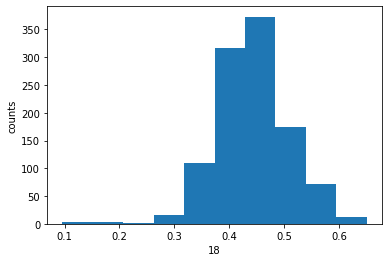

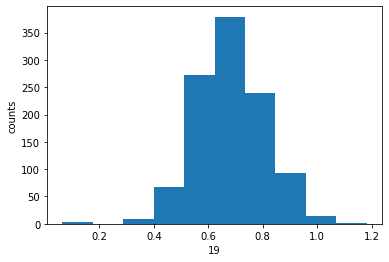

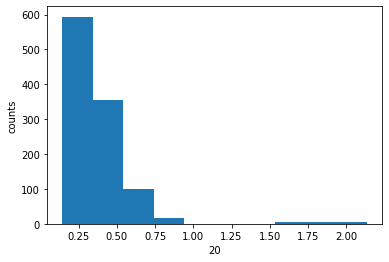

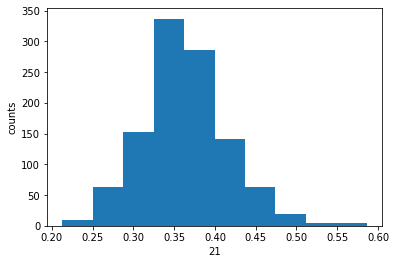

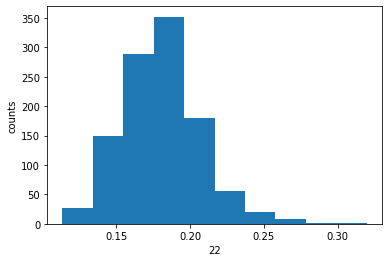

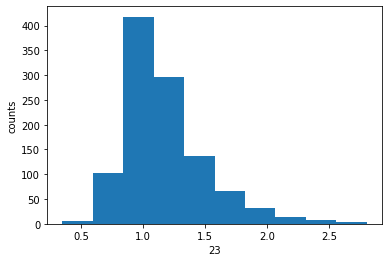

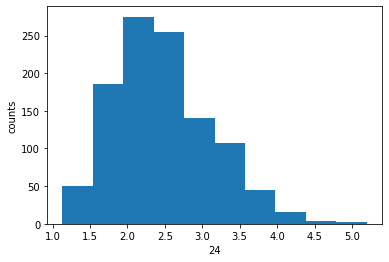

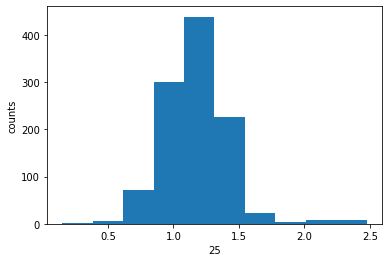

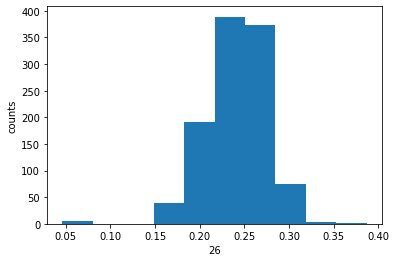

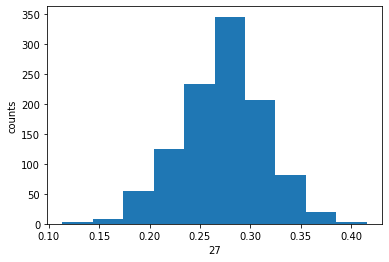

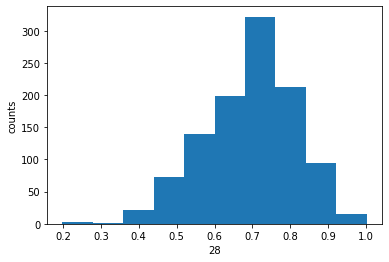

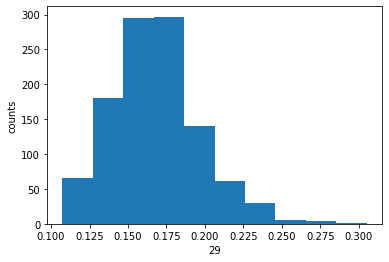

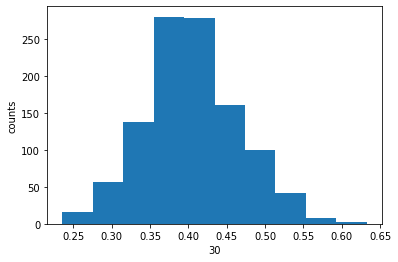

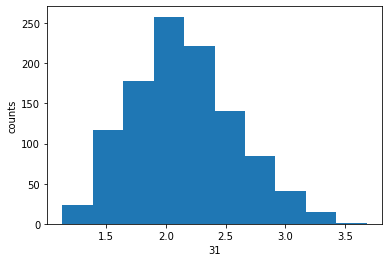

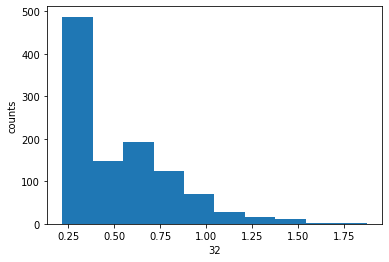

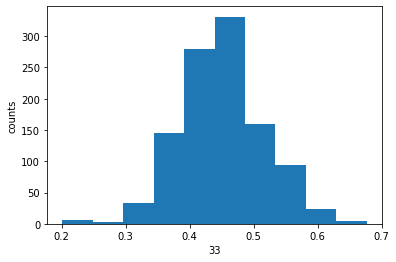

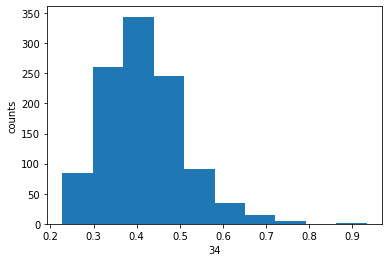

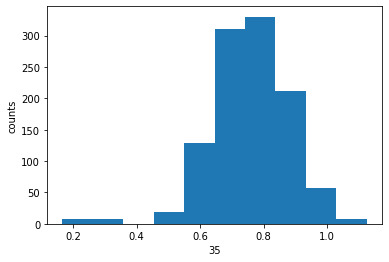

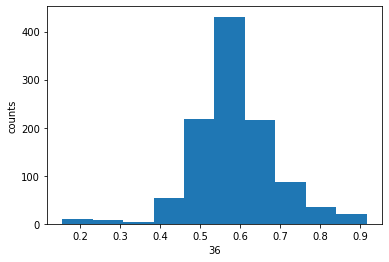

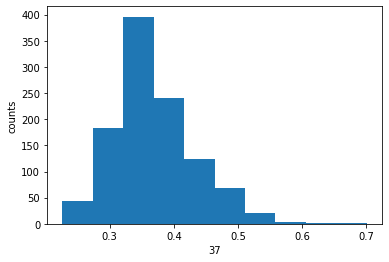

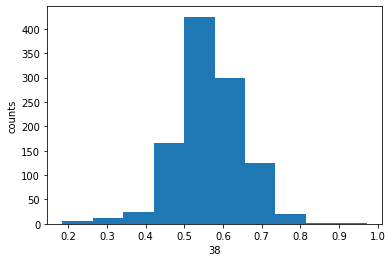

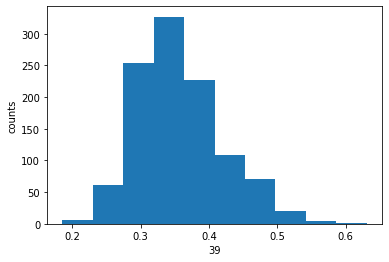

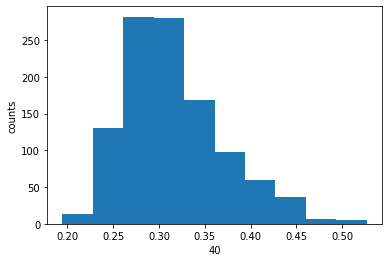

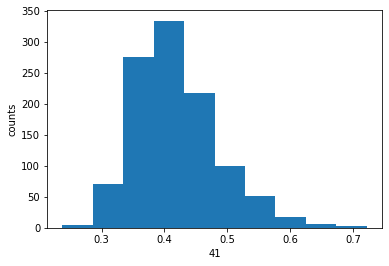

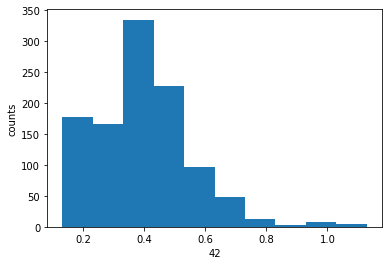

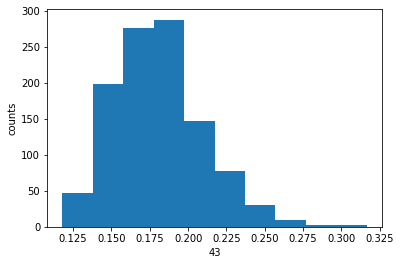

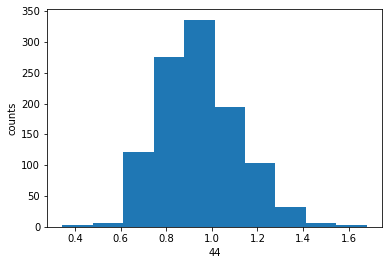

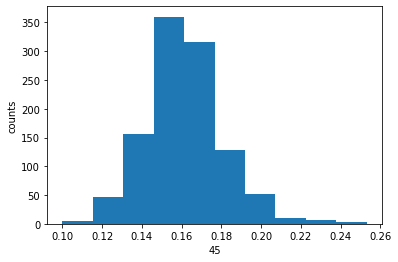

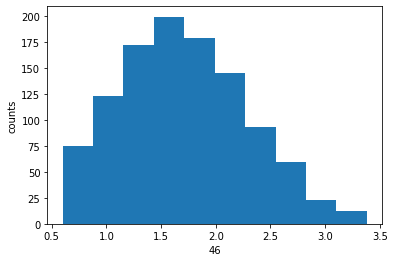

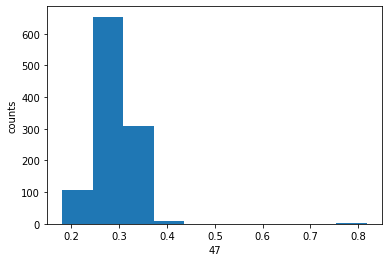

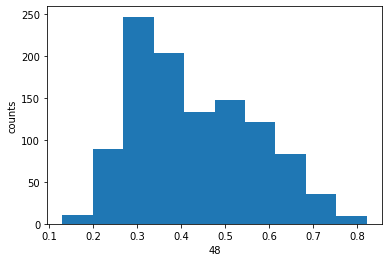

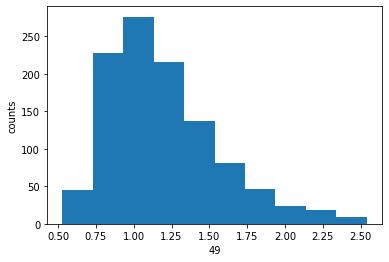

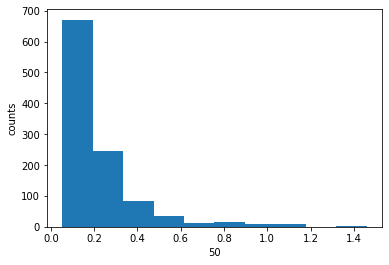

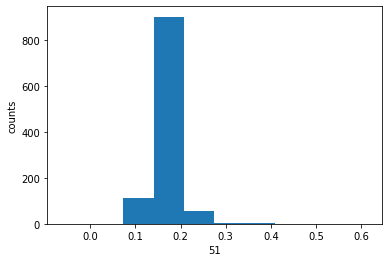

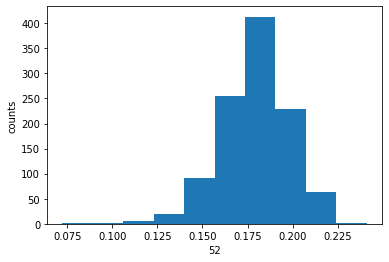

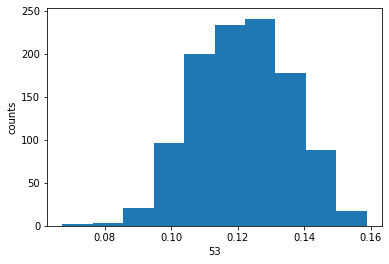

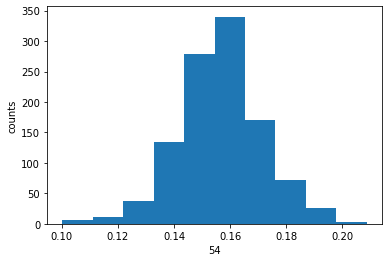

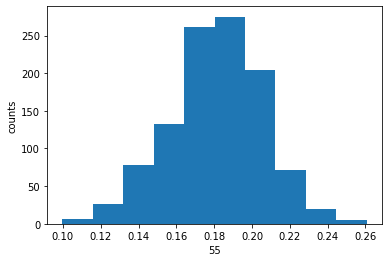

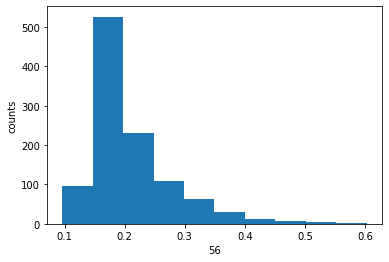

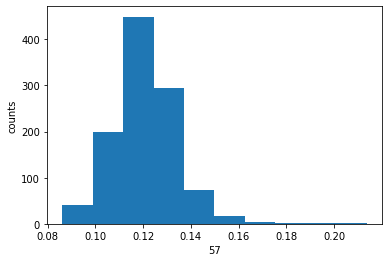

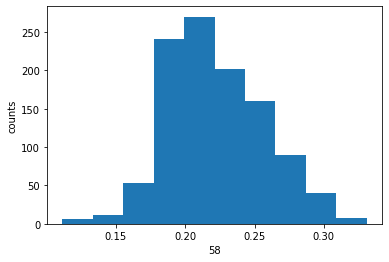

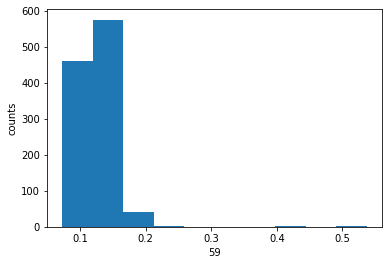

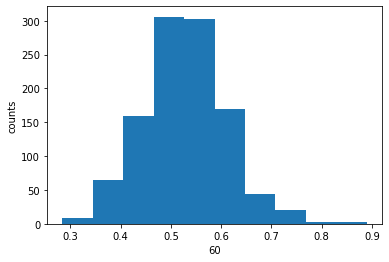

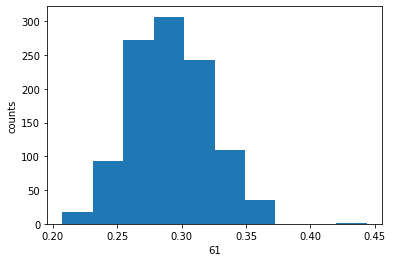

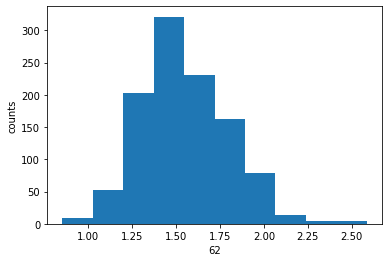

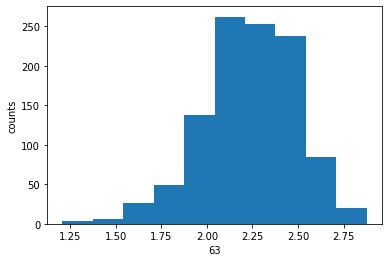

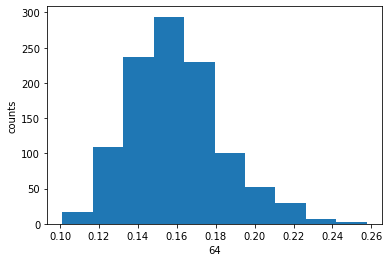

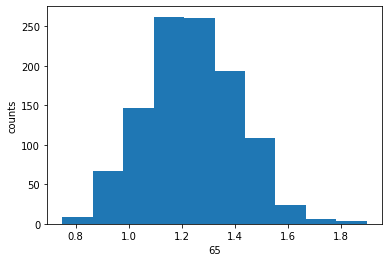

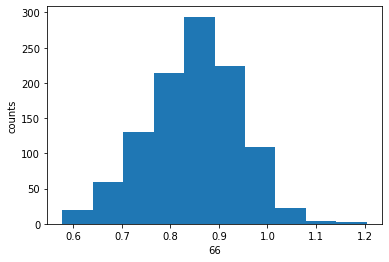

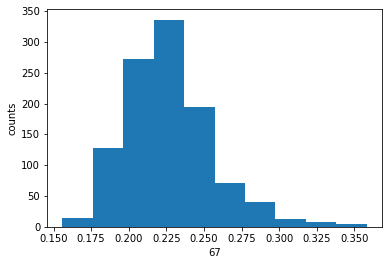

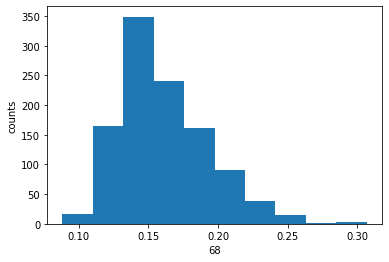

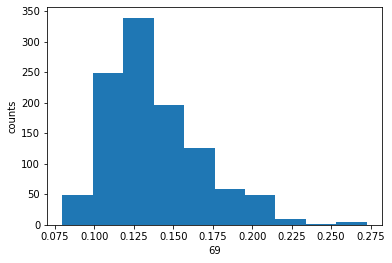

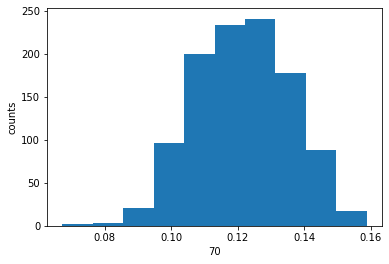

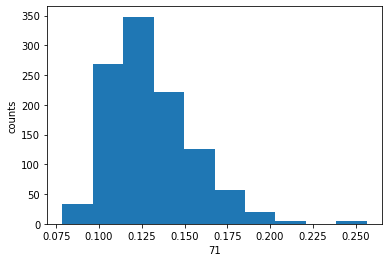

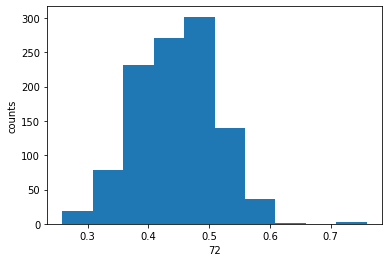

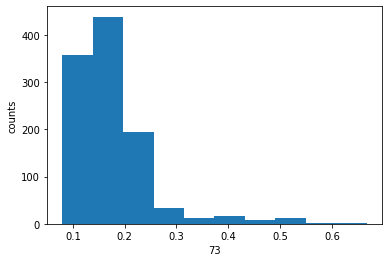

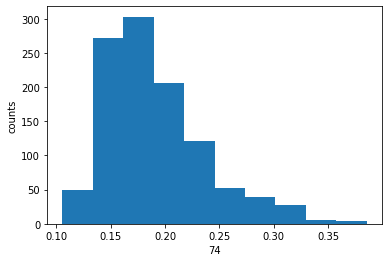

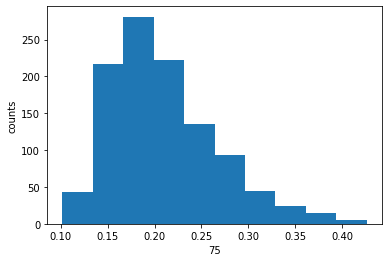

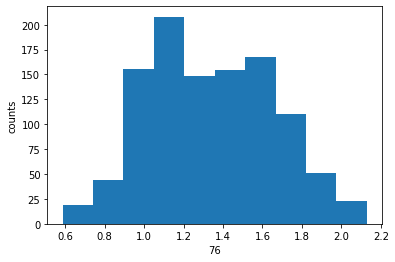

In [ ]:
get_column_histograms(df_features_imputed)

Observations:
Most features are centred and have gaussian-like profiles

Observe the scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd43beac0b8>,
      dtype=object)

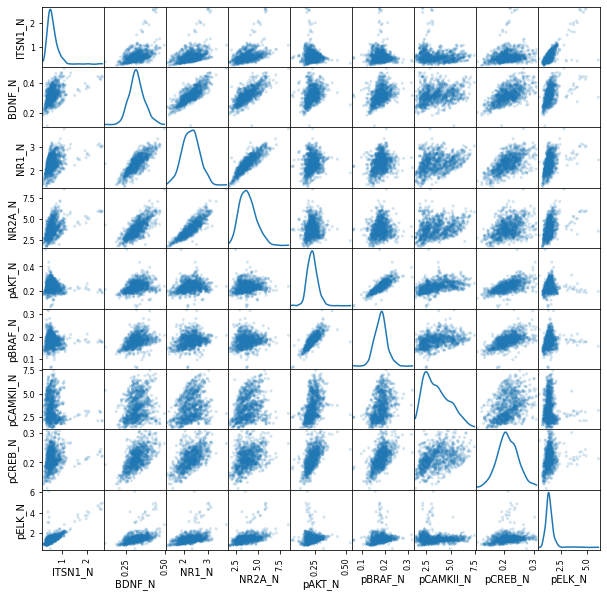

In [ ]:
n_features_plot = 10
# indices_to_plot = np.random.randint(0, len(features), size=n_features_plot)
# indices_to_plot = np.sort(indices_to_plot)
pd.plotting.scatter_matrix(df_features_imputed[features[1:n_features_plot]], alpha = 0.2, figsize=(n_features_plot, n_features_plot), diagonal = 'kde')


Observations:
Many features appear to be correlated, for eg:
1. NR1_N and NR2A_N
2. NR1_N and BDNF_N
3. pAKT_N and pBRAN_N
etc.

Plot Correlation Matrix

First, correlation matrix of the features whose scatter plots are visible above

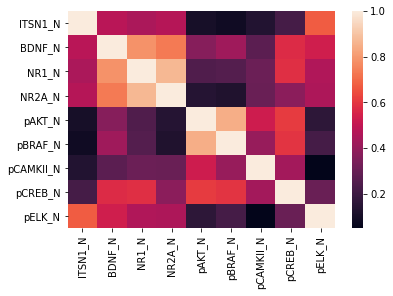

In [ ]:
corrmat_mini = df_features_imputed[features[1:n_features_plot]].corr(method='spearman')
sns.heatmap(abs(corrmat_mini), annot=False)
plt.show()

Observe the correlation matrix of the entire dataset (all features)

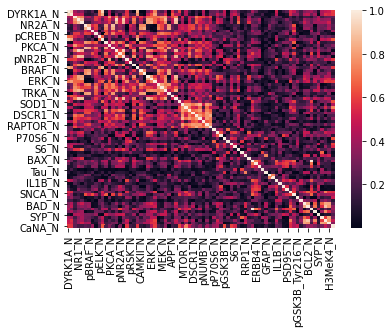

In [ ]:
corrmat = df_features_imputed.corr(method='spearman')
sns.heatmap(abs(corrmat), annot=False)
plt.show()

There are significant correlations between features, as indicated by the bright regions in the off-diagonal part of the correlation matrix

Split data into train-test sets. Also encode the 'object' types in 'class' column with integers

In [ ]:
elements_genotype = pd.unique(df_mice['Genotype'])
encode_genotype = np.linspace(1, len(elements_genotype), num=len(elements_genotype))
print(elements_genotype)
print(encode_genotype)

['Control' 'Ts65Dn']
[1. 2.]


In [ ]:
y_all = pd.DataFrame(df_mice['Genotype'])
y_encoded = y_all.replace(elements_genotype, encode_genotype)
# display(y_all)
# display(y_encoded)

In [ ]:
X = df_features_imputed.copy()
y = y_encoded

display(X)
display(y)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.108580,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.110223,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.110027,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.118306,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.129954,0.117433

,Genotype
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1075,2.0
1076,2.0
1077,2.0
1078,2.0


In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)
train_y = np.squeeze(train_y)
test_y = np.squeeze(test_y)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(810, 77)
(810,)
(270, 77)
(270,)


Normalize columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X)
train_X_norm = pd.DataFrame( scaler.transform(train_X) )# normalized

test_X_norm = pd.DataFrame( scaler.transform(test_X) ) # use scaler fit with training data on test data

display(train_X_norm)
display(test_X_norm)

print(train_X_norm.mean())
print(test_X_norm.mean())



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,-0.604626,-0.688031,0.018375,-0.568162,-1.009533,0.143191,1.424693,-0.980761,-0.155514,-0.144379,-0.776143,0.045126,-0.035243,0.781880,-0.221511,-0.183242,-0.516642,-0.998703,0.332187,-0.056418,-0.589946,0.680542,1.376503,-0.427548,-1.355707,-1.107324,0.341055,0.914452,-1.250293,0.325104,0.693703,-0.737577,1.026799,1.944623,5.808159,1.118026,2.337049,1.991433,2.029378,1.021359,2.808473,2.551977,1.264054,-0.500985,-1.063090,-0.082762,-0.543890,-1.203170,-1.537087,-0.458609,3.786235,2.322864,0.984851,0.854687,0.552087,-0.074119,2.696488,1.124365,-0.538022,0.452021,0.057622,-0.526959,-0.241495,-1.078208,1.837520,0.116130,-1.405610,0.902455,1.808609,1.432303,0.854687,1.601748,-0.729187,4.431707,2.678818,3.290034,-1.775002
1,-0.189451,-0.511041,-1.339138,-2.141423,-1.821947,-0.232947,0.498773,-1.128625,-0.441464,-0.548427,-0.005659,-0.509597,-1.295261,-0.633176,-2.021537,-0.977326,-1.693302,-1.772665,-0.931290,-1.738825,-0.123898,-0.914613,0.911346,-1.518968,-1.347618,-1.841453,-0.402890,-0.764644,-1.467584,-0.261362,-0.168726,-1.859059,-0.806241,-1.010765,-0.359211,-0.743711,0.126869,-1.720165,-1.073092,-0.147119,-0.622487,-0.668109,-1.171886,-1.410060,0.027847,0.392082,-1.155657,0.854224,-0.371626,-1.568270,-0.398841,0.921632,-1.901498,0.095120,0.553300,-1.009340,-0.528889,2.273182,1.897383,0.880235,0.952673,1.338903,0.710937,0.034435,2.155231,-0.025688,-0.768366,1.201205,3.168948,3.511190,0.095120,2.745306,1.543675,0.974319,3.306562,2.585173,0.227449
2,-0.250553,-0.195407,1.164081,1.395820,0.652074,0.687698,2.079491,1.907433,0.520695,0.572374,-0.480310,0.666110,1.671992,0.557494,1.452536,-0.070816,0.885539,0.754424,0.594830,0.860535,-0.260182,1.254067,1.393789,-0.003356,-0.034988,0.375041,1.319770,0.667931,0.638374,1.596189,2.171760,0.960849,0.237153,1.885678,1.221811,0.979430,2.896231,2.896679,2.335900,2.136669,2.637145,3.533192,3.511182,-0.174884,-1.131629,-0.554811,0.326132,-1.821563,-1.355390,0.160050,0.716089,1.318471,0.198394,-1.214032,-3.195747,-0.876064,-0.083902,0.067627,-0.686327,0.323015,-1.503427,-0.729967,-1.327391,-1.817015,0.264697,0.225926,-1.752706,-0.733725,0.887917,1.054581,-1.214032,0.452795,-1.317053,0.384491,0.432796,1.068776,-1.766030
3,-0.490553,-0.554241,-0.438280,0.509664,-0.014693,0.085158,-0.061131,1.222108,-0.274611,-0.370407,-0.451102,0.199873,-0.649729,-0.345186,0.516568,0.729109,0.706393,-0.778570,-0.699181,-0.301655,-0.493980,0.027730,-0.372601,-0.391078,-0.303389,-0.022584,-0.162946,-0.207733,-0.138080,-0.396107,-0.782974,0.229324,-0.048851,0.367161,0.666598,0.354643,-0.526319,-0.443768,-0.016548,-0.751431,-0.323388,-0.498405,0.191285,-0.309889,1.189403,-1.416996,-0.236435,-0.448535,-1.089090,-0.317580,-0.781299,-0.655566,-0.002174,1.036934,0.127363,0.503512,-0.975153,-0.882671,1.123058,0.616500,0.561650,-0.780903,0.533020,1.048080,0.122652,1.104597,0.336747,1.270151,-0.357469,0.061875,1.036934,-0.167332,0.329246,-0.682431,0.041787,-0.430155,-0.878262
4,-0.347944,-0.423964,-0.854481,-0.948421,-0.893210,-0.304176,-0.554645,0.069093,-1.520625,-0.373167,-0.579990,-0.773920,-1.100753,-0.914167,-0.909911,-0.676687,-0.825285,-1.175710,-0.443363,-0.310111,-0.515037,-0.643873,-0.264756,-0.769843,-0.776223,-0.437322,-0.946483,-0.677575,-1.451980,-0.742068,-0.133146,-1.010878,-0.080673,0.468763,0.963723,-0.054671,0.029613,-0.087976,-0.628191,-0.806324,-0.313706,-0.023316,0.000458,-1.642854,-0.213626,-2.302154,-0.751902,-1.968882,-1.379996,-1.367857,-0.716194,-1.373512,-0.815637,-0.533691,-1.285245,-0.533486,-0.798344,-1.395063,-0.331360,-1.033966,0.351442,-1.909545,-1.434525,-1.284029,-0.304044,-0.688150,-0.630700,0.276955,-0.162550,-0.172362,-0.533691,-0.123767,-1.302102,-0.454614,-0.167907,-0.532058,-1.189244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,0.608288,0.756235,-0.481214,0.083899,0.330296,-1.417993,-1.485962,-1.137202,-0.708711,0.317555,0.744034,-0.684453,-0.966088,-1.412897,0.540420,-0.348292,0.456676,-0.335388,-1.765392,0.186991,0.171581,-0.621330,-1.788870,0.571081,0.822678,0.498729,-1.044897,-1.279119,-0.096405,-1.853561,0.696767,-0.148818,-0.917570,-0.399467,-1.194663,-0.592773,-0.075046,-0.624225,-0.555364,0.535729,-1.001245,-0.022479,-1.601214,1.615024,1.659125,0.244359,-1.558721,0.059081,1.170178,2.041316,-0.730791,-0.228156,0.119951,-0.360049,-0.215536,-1.387536,0.349688,0.173176,0.682534,0.378038,-0.001738,-0.395326,0.862568,-0.289423,0.188511,-1.284678,0.035601,-0.983869,-1.032937,-0.996018,-0.360049,-0.250633,-0.692866,-1.042874,-0.988642,-1.431801,0.463577
1,0.789882,0.658446,0.259797,0.019067,0.159899,-0.524565,-0.740310,-0.733976,-0.136002,-0.077032,0.227765,-0.319679,0.147081,0.096576,-0.664413,-0.681973,-0.074897,0.957568,0.003194,-0.332193,0.106504,0.721086,-0.964802,0.421325,0.623929,0.523547,-0.020082,0.910001,0.491801,-0.543882,1.503293,0.143598,-0.786257,-1.052070,-1.398912,-0.773606,-0.430729,-0.843377,-0.799421,-0.309253,-1.039910,-0.342213,-0.474083,1.926810,0.238125,0.746599,0.976516,1.846442,1.375849,1.081583,0.523579,-0.273521,1.550903,-0.332297,0.694579,-1.581415,0.588350,0.718615,-0.264936,0.243618,-0.087753,1.462011,0.409807,0.682243,-0.129390,0.520387,0.946410,0.265297,-0.176061,-0.619790,-0.332297,-0.551633,1.635835,0.117120,-0.442742,-0.101588,1.504297
2,1.364197,1.716033,0.707256,0.849063,0.331902,-0.258519,-0.467503,1.632928,0.683105,0.444805,1.343935,0.086904,1.806217,-0.397495,0.464164,0.176961,0.243307,2.762441,1.836080,-0.206032,1.481041,-0.555528,-0.846043,1.275019,-0.062760,0.526501,0.077321,0.360284,0.963856,-0.350483,1.816322,0.483030,-0.817089,-0.468595,-0.834617,-0.471331,-0.305542,-0.287999,-0.266293,0.234197,-0.681928,0.453804,0.442759,1.432641,0.847383,0.668967,2.101412,0.849021,2.402736,1.743837,0.760470,-0.022572,0.897104,-0.813070,-0.102429,0.313085,0.804877,-0.141056,0.502334,1.718693,-0.613262,0.287031,0.613541,0.076660,-0.854914,0.698520,1.666563,-0.066345,-0.492363,-0.930907,-0.813070,-0.381221,0.021913,0.022653,-1.073917,-0.678241,1.038630
3,-0.785803,-0.911557,-1.391501,-0.860460,-0.883645,-0.348045,-0.972914,-0.784737,-1.289672,-0.805031,-0.775121,-1.171377,-1.730822,-1.125443,-0.781099,-0.867094,-0.834396,-1.077504,-0.792664,0.273023,-0.683675,-0.978651,-0.481787,-0.575270,-0.570210,-1.238586,-0.997740,-1.049007,-1.086825,-0.957124,-2.046091,-0.796454,0.160629,-1.681741,-1.233209,-1.576322,-1.489479,-1.643143,-1.372555,-2.114268,-1.671173,-1.767768,-1.154449,0.079637,0.045089,0.015942,-0.968945,-0.013241,-0.784218,-0.851003,-0.570933,-0.329967,1.046056,0.896159,0.441067,0.700501,-0.561378,-0.010372,-0.437568,-0.524968,1.210968,-0.475998,0.230633,0.620239,-0.123136,0.415155,0.346391,0.824504,0.046658,0.175771,0.896159,1.571334,0.116686,-0.232144,-0.045881,0.894523,0.412334
4,0.151951,0.204500,1.200122,1.183962,1.007608,0.018644,0.010454,0.440668,0.187623,-0.209106,0.403226,0.557245,1.490340,-0.027014,1.011160,0.888999,0.868581,1.872013,0.942394,-0.064092,0.058913,-0.300590,-0.176664,0.562820,0.724904,1.136169,0.913118,0.797260,1.427050,-0.111239,0.312293,0.820543,-0.789699,0.202960,-0.359008,-0.241807,-0.366788,0.253381,0.102154,0.195457,-0.731147,-0.448422,-0.205672,0.683049,-0.166968,-0.101938,0.556411,0.917369,-0.099695,1.339269,-0.401982,-0.377524,0.286029,-0.603878,0.067796,0.296923,-0.832526,-0.401458,0.488174,-0.114702,-0.416397,0.766083,-0.010390,0.888625,-1.387161,-0.113816,0.736456,-0.569392,-0.672953,-1.093194,-0.603878,-0.703179,0.993373,-0.820216,-0.919099,-1.090960,1.974821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

0    -6.871218e-17
1     5.451743e-17
2    -1.854484e-16
3     6.701772e-16
4     2.628213e-16
          ...     
72    4.756141e-17
73   -1.046488e-16
74   -4.462308e-16
75   -4.124273e-16
76   -4.325758e-16
Length: 77, dtype: float64
0     0.006800
1     0.038505
2     0.011008
3     0.038420
4     0.000420
        ...   
72   -0.059004
73   -0.099458
74   -0.090199
75   -0.077828
76    0.076366
Length: 77, dtype: float64


Observations: After scaling, the mean of training data is zero. Mean of test data is small, but not zero

# PART D: Training, Validation and Testing

LASSO Logistic Regression

In [ ]:
def get_grid_search_results(estimator, hyper_parameters, scoring, train_X, train_y, test_X, test_y):
  clf = GridSearchCV(estimator = estimator, param_grid = hyper_parameters, scoring=scoring, cv=5)  # perform 5 fold cross validation over alpha=0.1, 0.5
  clf.fit(train_X, train_y)
  print(f"Best parameters: \n {clf.best_params_}")
  print(f"Best score: {str(clf.best_score_)}")
  y_predict = clf.predict(test_X)
  print(f"Classification report: \n {classification_report(test_y, y_predict)}")
  print(f"Test ROC-AUC Score: {str(roc_auc_score(test_y, y_predict))}")

In [ ]:
def get_trained_model(estimator, train_X, train_y, test_X, test_y, metric_for_test):
  estimator.fit(train_X, train_y)
  y_predict = estimator.predict(test_X)
  performance = metric_for_test(test_y, y_predict)
  return estimator, performance

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
score_lasso = 'f1'

hyperparameters_lasso = {'C':[0.01, 0.1, 1, 10, 100, 500]}
get_grid_search_results(LogisticRegression(penalty='l1', solver = 'liblinear'), hyperparameters_lasso,score_lasso, train_X_norm, np.squeeze(train_y), test_X_norm, np.squeeze(test_y))

lasso_model1, performance_model1 = get_trained_model(LogisticRegression(penalty='l1', solver = 'liblinear', C = 1), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)
lasso_model2, performance_model2 = get_trained_model(LogisticRegression(penalty='l1', solver = 'liblinear', C=0.01), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)

print(f"model 1 of LASSO Logistic Regression with C=1 has ROC-AUC score:{performance_model1}")
print(f"model 2 of LASSO Logistic Regression with C=0.01 has ROC-AUC score:{performance_model2}")


Best parameters: 
 {'C': 1}
Best score: 0.9680787131605506
Classification report: 
               precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       134
         2.0       0.98      0.94      0.96       136

    accuracy                           0.96       270
   macro avg       0.96      0.96      0.96       270
weighted avg       0.96      0.96      0.96       270

Test ROC-AUC Score: 0.9593942054433714
model 1 of LASSO Logistic Regression with C=1 has ROC-AUC score:0.9593942054433714
model 2 of LASSO Logistic Regression with C=0.01 has ROC-AUC score:0.8111830553116769


C=1 performs much better than C=0.01

In [ ]:
len(np.argwhere(np.squeeze(lasso_model1.coef_)==0))

25

Hence, there are many features which are given zero weights. This corresponds to feature elimination, which arises due to L1 regularization

Ridge Logistic Regression

In [ ]:
hyperparameters_ridge = {'C':[0.01, 0.1, 1, 10, 50, 100, 500]}
scoring_ridge = 'f1'

get_grid_search_results(LogisticRegression(penalty='l2', solver='liblinear'), hyperparameters_ridge, scoring_ridge, train_X_norm, train_y, test_X_norm, test_y)

ridge_model1, performance_ridge_model1 = get_trained_model(LogisticRegression(penalty='l2', solver = 'liblinear', C = 1), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)
ridge_model2, performance_ridge_model2 = get_trained_model(LogisticRegression(penalty='l2', solver = 'liblinear', C=50), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)

print(f"Model 1 of Ridge Logistic Regression with C=1 has ROC-AUC score:{performance_ridge_model1}")
print(f"Model 2 of Ridge Logistic Regression with C=50 has ROC-AUC score:{performance_ridge_model2}")


Best parameters: 
 {'C': 1}
Best score: 0.9706484821409589
Classification report: 
               precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       134
         2.0       0.98      0.93      0.95       136

    accuracy                           0.96       270
   macro avg       0.96      0.96      0.96       270
weighted avg       0.96      0.96      0.96       270

Test ROC-AUC Score: 0.9557177348551361
Model 1 of Ridge Logistic Regression with C=1 has ROC-AUC score:0.9557177348551361
Model 2 of Ridge Logistic Regression with C=50 has ROC-AUC score:0.9482550482879719


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

hyperparameters_ranfor = {'max_depth': [1, 5,10, 20, 50, 100], 'n_estimators':[10, 50, 100, 200]}
scoring_ranfor = 'f1'
get_grid_search_results(RandomForestClassifier(), hyperparameters_ranfor, scoring_ranfor, train_X_norm, train_y, test_X_norm, test_y)

ranfor_model1, performance_ranfor_model1 = get_trained_model(RandomForestClassifier(max_depth = 100, n_estimators=200), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)
ranfor_model2, performance_ranfor_model2 = get_trained_model(RandomForestClassifier(max_depth = 50, n_estimators = 10), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)

print(f"Model 1 of Random Forest Classifier with max depth = 100, n_estimators = 200 has ROC-AUC score:{performance_ranfor_model1}")
print(f"Model 2 of Random Forest Classifier with max_depth=50, n_estimators = 10 has ROC-AUC score:{performance_ranfor_model2}")

Best parameters: 
 {'max_depth': 100, 'n_estimators': 100}
Best score: 0.9853206152408012
Classification report: 
               precision    recall  f1-score   support

         1.0       0.94      1.00      0.97       134
         2.0       1.00      0.94      0.97       136

    accuracy                           0.97       270
   macro avg       0.97      0.97      0.97       270
weighted avg       0.97      0.97      0.97       270

Test ROC-AUC Score: 0.9705882352941176
Model 1 of Random Forest Classifier with max depth = 100, n_estimators = 200 has ROC-AUC score:0.9742647058823529
Model 2 of Random Forest Classifier with max_depth=50, n_estimators = 10 has ROC-AUC score:0.9557177348551361


Thus, for all three types of models: Logistic regression with L1, L2 regularization, and Random Forest Classifiers, the hyperparameter chosen as best by cross validation performed better than others on the test set

# PART E: Recursive Feature Elimination to improve model performance

In [ ]:
# trying recursive feature elimination on random forest classifier
from sklearn.feature_selection import RFECV
random_forest_new = RandomForestClassifier(max_depth = 20)# same max depth as model2 in random forest classifier
selector = RFECV(estimator = random_forest_new,step =1, cv=5)
selector = selector.fit(train_X_norm, train_y)


In [ ]:
selector.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True])

In [ ]:
selector.ranking_

array([ 1,  1,  1,  1,  1,  1,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, 12,  1,  6,  1,  1,  1,  1,  1,  1,  1, 10,  1, 13,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  1,  5,  1,  1,  1,
        7,  1,  1,  8,  1,  1, 11,  1,  1])

In [ ]:
y_predict_rfe = selector.predict(test_X_norm)
print(y_predict_rfe)

[2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2.
 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1.
 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 2. 2.
 1. 2. 1. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 2.
 2. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2. 1.
 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1.
 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 2. 1.
 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2.
 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2.
 2. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 1. 2. 1. 2. 1. 2.]


In [ ]:
performance_rfe = roc_auc_score(test_y ,y_predict_rfe)
print(f"ROC-AUC score: \n Without RFE: {performance_ranfor_model2}, \n With RFE: {performance_rfe}")

ROC-AUC score: 
 Without RFE: 0.9557177348551361, 
 With RFE: 0.9705882352941176


Thus, there is an increase in performance (ROC-AUC score) upon using Recursive Feature Elimination

In [ ]:
ridge_rfe = LogisticRegression(penalty='l2', solver='liblinear', C=0.1) # same as model 1 in ridge logistic regression
selector_ridge = RFECV(ridge_rfe, step=1, cv=5)
selector_ridge = selector_ridge.fit(train_X_norm, train_y)
print(selector_ridge.support_)

[ True  True  True  True  True  True False False  True  True  True False
  True False  True  True  True  True  True  True  True  True False  True
  True False False  True  True  True  True False  True  True  True  True
  True  True  True  True False  True  True  True  True False  True  True
  True False False  True False  True  True False  True False  True False
  True  True  True False False  True False  True False False  True False
  True False False False False]


In [ ]:
selector_ridge.ranking_

array([ 1,  1,  1,  1,  1,  1, 26, 14,  1,  1,  1,  8,  1, 17,  1,  1,  1,
        1,  1,  1,  1,  1,  4,  1,  1, 16, 24,  1,  1,  1,  1,  2,  1,  1,
        1,  1,  1,  1,  1,  1, 21,  1,  1,  1,  1,  3,  1,  1,  1, 27, 23,
        1, 18,  1,  1,  9,  1, 20,  1, 10,  1,  1,  1, 11, 12,  1, 15,  1,
       19,  6,  1,  7,  1, 25, 22,  5, 13])

In [ ]:
y_predict_ridge_rfe = selector_ridge.predict(test_X_norm)
performance_ridge_rfe = roc_auc_score(test_y, y_predict_ridge_rfe)
print(f"ROC-AUC score: \n Without RFE: {performance_ridge_model1}, \n With RFE: {performance_ridge_rfe}")

ROC-AUC score: 
 Without RFE: 0.9557177348551361, 
 With RFE: 0.9631804214223003


Thus, even in Ridge (L2 regularized) Logistic regression, RFE leads to improved performance (i.e. higher ROC-AUC score)

Credits:

1. EE769 1 2 2 ML for Smart Monkeys, Youtube, Prof Amit Sethi, EE IITB

2. Mice Gene expression data to predict Down Syndrome: https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression#
3. scikit-learn tutorials and user guide https://scikit-learn.org/ .
4. Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. (citation for software use)